<a href="https://colab.research.google.com/github/Stanleynjoroge/spatial_deep_learning/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step


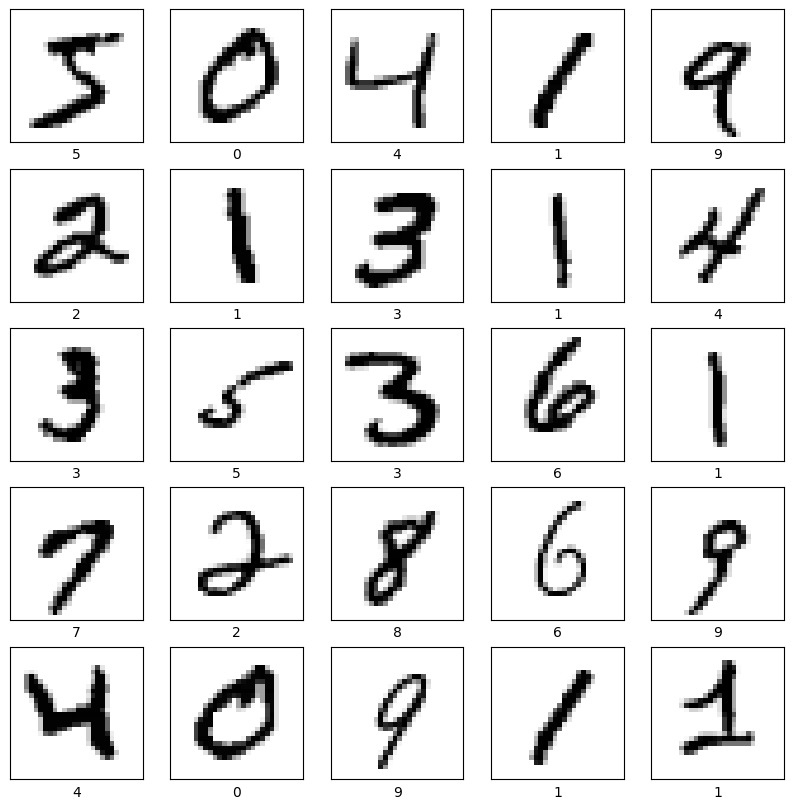

Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1526 - accuracy: 0.9525 - val_loss: 0.0506 - val_accuracy: 0.9849
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0324 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0259 - val_accuracy: 0.9922
313/313 - 2s - loss: 0.0259 - accuracy: 0.9922 - 2s/epoch - 8ms/step
Test accuracy: 0.9922000169754028


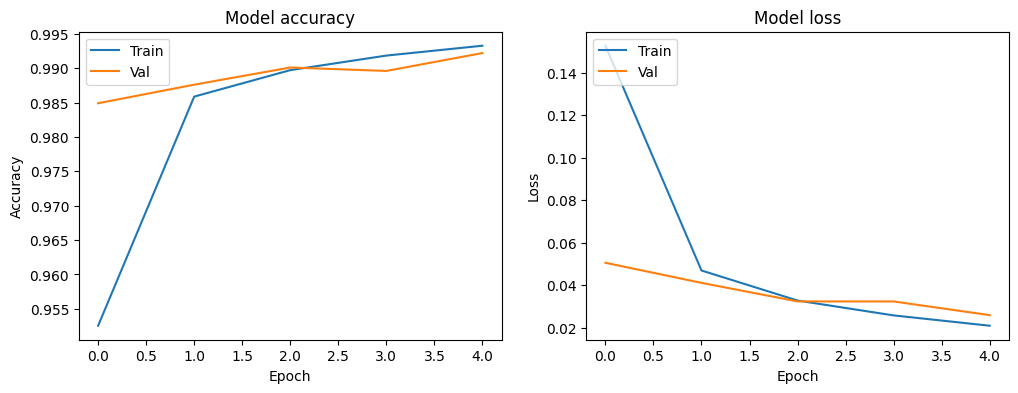

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()
